In [114]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [116]:
import pandas as pd
path= ('/content/ecg_vaanmathi-1.csv')
eog = pd.read_csv(path)
eog.head()

,Timestamp,ECG_Value
0,2026-02-26 15:13:36,0.05
1,2026-02-26 15:13:36,-0.14
2,2026-02-26 15:13:36,0.11
3,2026-02-26 15:13:36,0.05
4,2026-02-26 15:13:36,-0.10


In [117]:
noise_mean = eog["ECG_Value"].mean()
noise_std = eog["ECG_Value"].std()

threshold = noise_mean + 3 * noise_std
print(threshold)

0.041288078181798


In [118]:
eog.describe()

,ECG_Value
count,1735.000000
mean,-0.000029
std,0.013772
min,-0.140000
25%,0.000000
50%,0.000000
75%,0.000000
max,0.130000


In [119]:


eog['ECG_Value'] = eog['ECG_Value'].apply(
    lambda x: 0 if x <= 0 else x
)
eog = eog.groupby('Timestamp', as_index=False)['ECG_Value'].max()
eog.head()

,Timestamp,ECG_Value
0,2026-02-26 15:13:36,0.11
1,2026-02-26 15:13:37,0.02
2,2026-02-26 15:13:38,0.03
3,2026-02-26 15:13:39,0.02
4,2026-02-26 15:13:40,0.01


In [120]:
eog.describe()

,ECG_Value
count,24.000000
mean,0.025417
std,0.031344
min,0.010000
25%,0.010000
50%,0.010000
75%,0.020000
max,0.130000


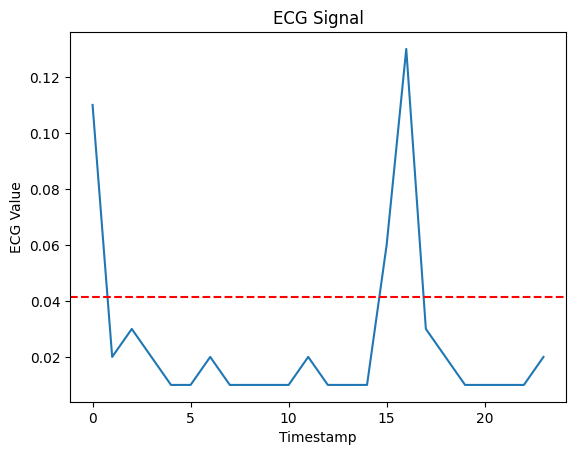

In [121]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(eog['ECG_Value'])

plt.axhline(y=threshold, color='red', linestyle='--', label='Threshold (0.055)')

plt.xlabel("Timestamp")
plt.ylabel("ECG Value")
plt.title("ECG Signal")

plt.show()